In [ ]:
# SVM
# categorical - SVC -classifier
# continuous - SVR - Regressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('D:\Python\Machine-Learning\Regression Algorithms\Position_Salaries.csv')

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
# input
X=dataset.iloc[:,1:2].values

In [5]:
X.shape

(10, 1)

In [6]:
# output
y=dataset.iloc[:,2].values

In [7]:
# split dataset into train and test
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [9]:
X_train

array([[ 5],
       [10],
       [ 2],
       [ 7],
       [ 8],
       [ 4],
       [ 1],
       [ 6]], dtype=int64)

In [10]:
X_test

array([[3],
       [9]], dtype=int64)

In [11]:
y_test

array([ 60000, 500000], dtype=int64)

In [12]:
# Scale
from sklearn.preprocessing import StandardScaler

In [13]:
sc_X=StandardScaler()
sc_Y=StandardScaler()

In [14]:
X=sc_X.fit_transform(X)

In [15]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [17]:
y=sc_Y.fit_transform(y.reshape(-1,1))

In [18]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [19]:
from sklearn.svm import SVR

In [22]:
regressor=SVR(kernel='rbf')

In [23]:
regressor.fit(X,y)

C:\Users\xthaz\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [24]:
y_pred=regressor.predict(sc_X.transform(np.array([[6.5]])))

In [25]:
y_pred

array([-0.27861589])

In [28]:
y_pred=sc_Y.inverse_transform(y_pred.reshape(-1,1))

In [29]:
y_pred

array([[170370.0204065]])

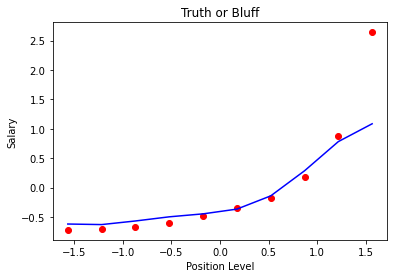

In [33]:
# visualize
plt.scatter(X,y,c='red')
plt.plot(X,regressor.predict(X),c='blue')
plt.title("Truth or Bluff")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()